# NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Build a model to accurately predict whether the patients in the dataset have diabetes or not.

In [162]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv('health care diabetes.csv')

In [164]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies	   - Number of times pregnant

Glucose	       - Plasma glucose concentration in an oral glucose tolerance test

BloodPressure  - Diastolic blood pressure (mm Hg)

SkinThickness  - Triceps skinfold thickness (mm)

Insulin	       - Two hour serum insulin

BMI	           - Body Mass Index

DiabetesPedigreeFunction	- Diabetes pedigree function

Age	           - Age in years

Outcome	       - Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [165]:
df.shape

(768, 9)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Processing Missing Values

In [167]:
#column-wise missing values
round((df.isnull().sum()/df.shape[0])*100,2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

#No missing values available

zero does not make sense and thus indicates missing value for columns Glucose/BloodPressure/SkinThickness/Insulin/BMI

In [168]:
missing_value_columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [169]:
#Missing values in Glucose
df["Glucose"].value_counts()[0]

5

In [170]:
#Missing values in BloodPressure
df["BloodPressure"].value_counts()[0]

35

In [171]:
#Missing values in SkinThickness
df["SkinThickness"].value_counts()[0]

227

In [172]:
#Missing values in Insulin
df["Insulin"].value_counts()[0]

374

In [173]:
#Missing values in BMI
df["BMI"].value_counts()[0]

11

In [174]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [175]:
mean_df_glucose = df.groupby('Outcome')['Glucose'].mean()
mean_df_glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

In [176]:
missing_value_col_updated = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [177]:
mean_nonDiabestes = df.loc[df["Outcome"]==0].mean()
mean_nonDiabestes

Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

In [178]:
nonDiabetic_Glucose_Mean = round(mean_nonDiabestes["Glucose"],0)
nonDiabetic_Glucose_Mean

110.0

In [114]:
mean_diabestes = df.loc[df["Outcome"]==1].mean()
mean_diabestes

Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [179]:
diabetic_Glucose_Mean = round(mean_diabestes["Glucose"],0)
diabetic_Glucose_Mean

141.0

In [180]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [181]:
def setMissingValues(missing_value_columns) :
    for column in missing_value_columns:
        df[column] = np.where((df[column] == 0) & (df['Outcome'] == 0), round(df.loc[df['Outcome']==0].mean()[column]), df[column]) 
        df[column] = np.where((df[column] == 0) & (df['Outcome'] == 1), round(df.loc[df['Outcome']==1].mean()[column]), df[column]) 

In [182]:
missing_value_col_updated = ["Glucose","BloodPressure","SkinThickness","Insulin"]

In [183]:
setMissingValues(missing_value_col_updated)

In [184]:
df["BMI"] = np.where((df["BMI"] == 0) & (df['Outcome'] == 0), round(df.loc[df['Outcome']==0].mean()["BMI"]), df["BMI"]) 
df["BMI"] = np.where((df["BMI"] == 0) & (df['Outcome'] == 1), round(df.loc[df['Outcome']==1].mean()["BMI"]), df["BMI"])

In [185]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691406,72.266927,26.677083,118.971354,32.435286,0.471876,33.240885,0.348958
std,3.369578,30.460693,12.117110,9.601847,93.535785,6.881492,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,69.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visually explore these variables using histogram

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

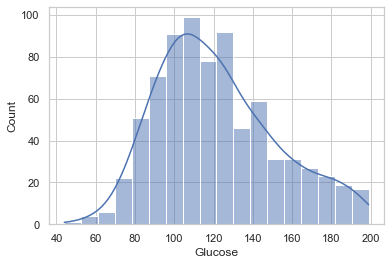

In [186]:
sns.set(style='whitegrid')
sns.histplot(data = df, x= "Glucose", kde=True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

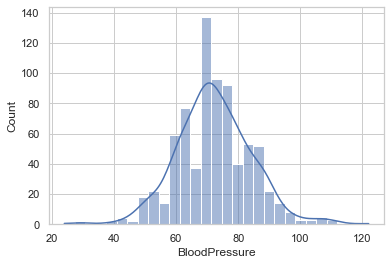

In [133]:
sns.histplot(data = df, x= "BloodPressure", kde=True)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

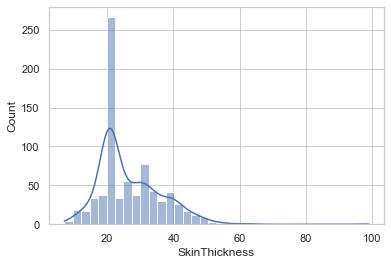

In [187]:
sns.histplot(data = df, x= "SkinThickness", kde=True)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

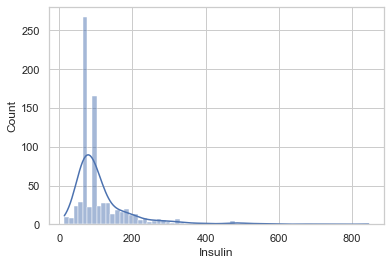

In [188]:
sns.histplot(data = df, x= "Insulin", kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

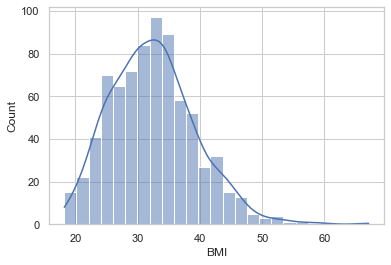

In [189]:
sns.histplot(data = df, x= "BMI", kde=True)

###### Skewness is almost normal except few outlier observed which we can consider later

### count (frequency) plot describing the data types and the count of variables

In [190]:
## Removing outliers
def remove_outliers(df1):
    IQR = df1.quantile(0.75) - df1.quantile(0.25)
    ub = df1.quantile(0.75) + 1.5*IQR 
    lb = df1.quantile(0.25) - 1.5*IQR
    
    new_vals = []
    for val in df1.values:
        if val<lb:
            new_vals.append(lb)
        elif val>ub:
            new_vals.append(ub)
        else: new_vals.append(val)
    
    return new_vals

In [191]:
df['Glucose'] = remove_outliers(df['Glucose'])
df['BloodPressure'] = remove_outliers(df['BloodPressure'])
df['SkinThickness'] = remove_outliers(df['SkinThickness'])
df['Insulin'] = remove_outliers(df['Insulin'])
df['BMI'] = remove_outliers(df['BMI'])
df['DiabetesPedigreeFunction'] = remove_outliers(df['DiabetesPedigreeFunction'])
df['Age'] = remove_outliers(df['Age'])

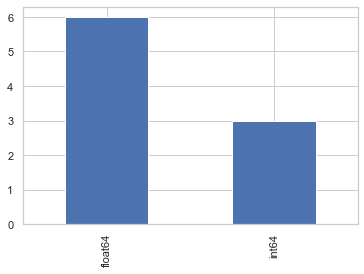

In [192]:
df.dtypes.value_counts().plot(kind='bar');

### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action

0    500
1    268
Name: Outcome, dtype: int64

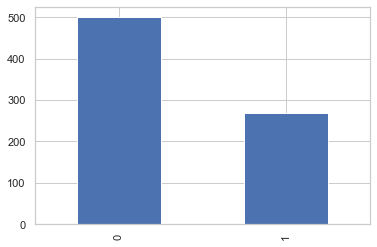

In [193]:
df['Outcome'].value_counts().plot(kind='bar')
df['Outcome'].value_counts()

###### As the Outcome is skewed required SMOTE for class 1

In [194]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [195]:
X.shape

(768, 8)

In [196]:
y.shape

(768,)

In [144]:
# installing imblearn to implement smote and random oversampling
!pip install imblearn

     ------------------------------------ 199.3/199.3 kB 549.7 kB/s eta 0:00:00


In [197]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
print("No. of rows before smote implementation: ",X.shape[0])
X_res, y_res = sm.fit_resample(X, y)
print("No. of rows after smote implementation: ",X_res.shape[0])

No. of rows before smote implementation:  768
No. of rows after smote implementation:  1000


In [198]:
from collections import Counter
print("Class distribution before Smote: ",Counter(y))
print("Class distribution after Smote: ",Counter(y_res))

Class distribution before Smote:  Counter({0: 500, 1: 268})
Class distribution after Smote:  Counter({1: 500, 0: 500})


1    500
0    500
Name: Outcome, dtype: int64

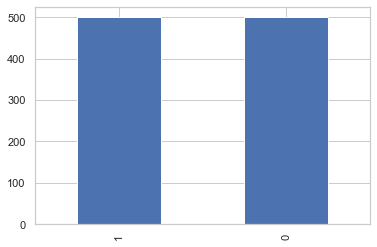

In [199]:
y_res.value_counts().plot(kind='bar')
y_res.value_counts()

### Scatter charts between the pair of variables to understand the relationships.

In [200]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Software_Install_Details\Anaconda3\envs\TENSORFLOW_KERAS\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


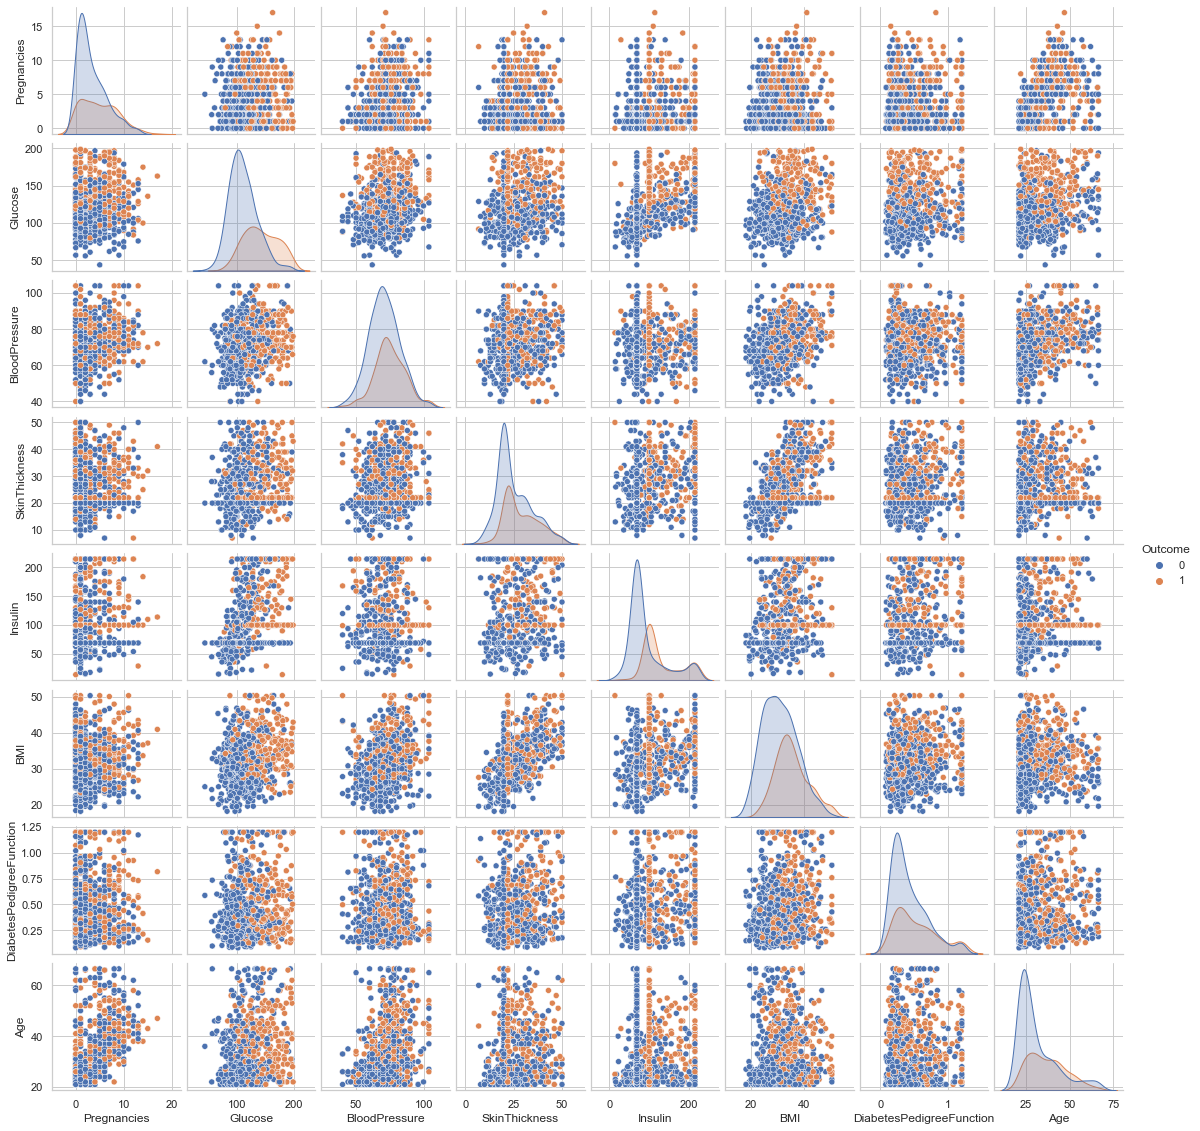

In [201]:
sns.set(style='whitegrid')
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', ]
sns.pairplot(df, hue="Outcome", size=2)

In [202]:
df_res = pd.concat([X_res, y_res], axis=1)
df_res

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.000000,100.000,33.600000,0.627000,50.000000,1
1,1,85,66.000000,29.000000,69.000,26.600000,0.351000,31.000000,0
2,8,183,64.000000,22.000000,100.000,23.300000,0.672000,32.000000,1
3,1,89,66.000000,23.000000,94.000,28.100000,0.167000,21.000000,0
4,0,137,40.000000,35.000000,168.000,43.100000,1.200000,33.000000,1
...,...,...,...,...,...,...,...,...,...
995,1,194,67.339649,39.147229,214.625,30.393586,0.221848,54.596210,1
996,1,123,67.577838,20.605540,100.000,28.792743,0.245522,35.697230,1
997,4,146,84.512270,22.000000,100.000,35.104316,0.528838,63.941608,1
998,7,144,104.000000,22.000000,100.000,46.511460,0.237562,39.464582,1


C:\Software_Install_Details\Anaconda3\envs\TENSORFLOW_KERAS\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


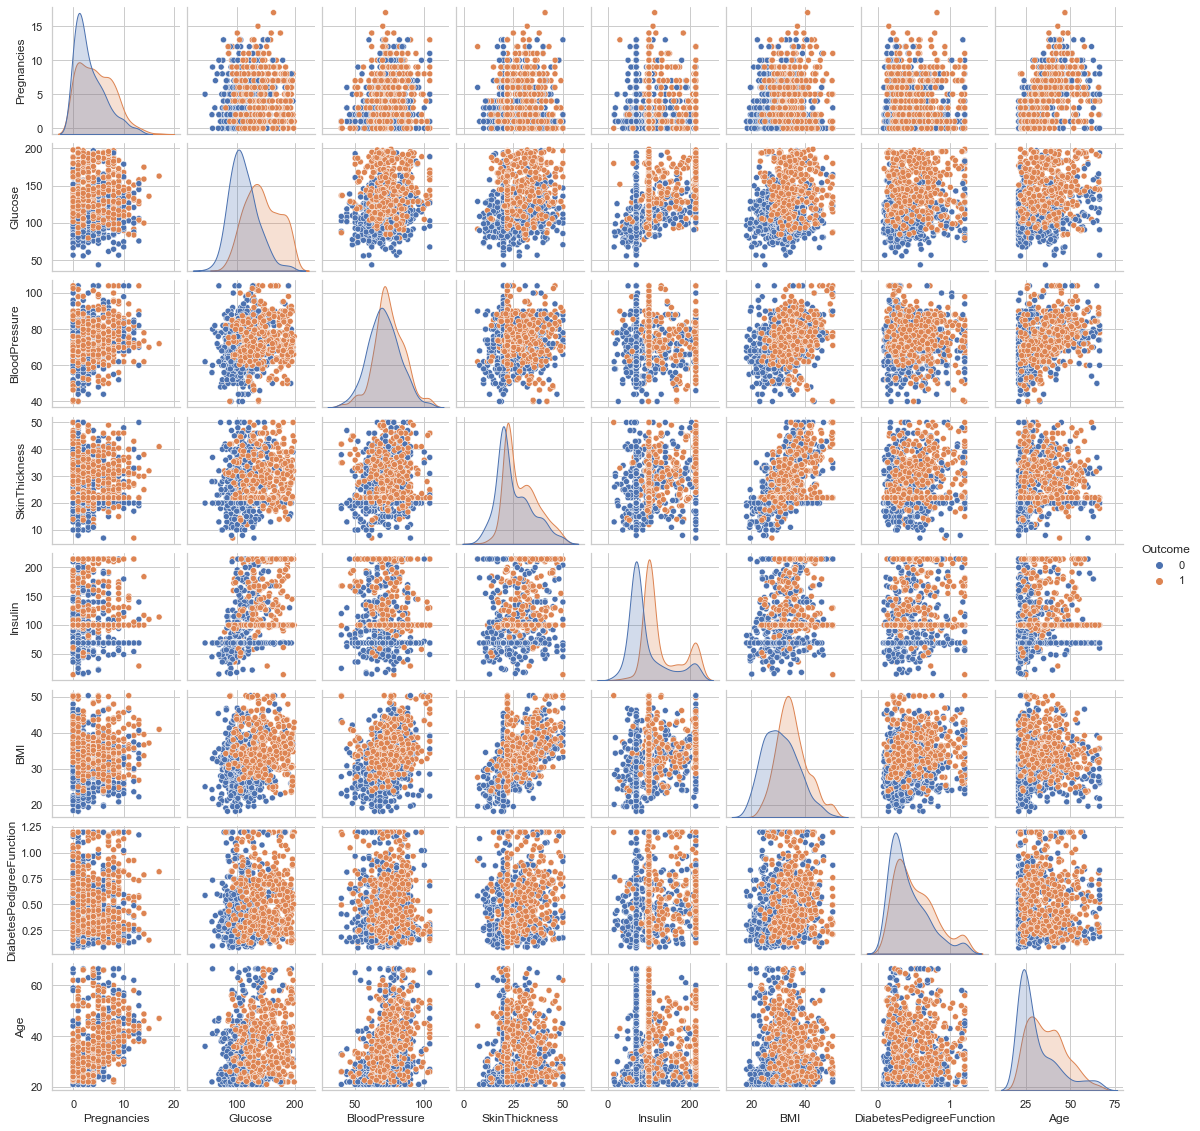

In [203]:
sns.pairplot(df_res, hue="Outcome", size=2)

###### Glucose has direct relationship with Outcome. None of the feature cannot distinguish the Outcome

### Perform correlation analysis. Visually explore it using a heat map

In [204]:
X_res.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.116768,0.230917,0.010173,0.002220,0.021314,-0.016627,0.549501
Glucose,0.116768,1.000000,0.207077,0.157186,0.458336,0.229038,0.128014,0.280322
BloodPressure,0.230917,0.207077,1.000000,0.106406,0.001746,0.277786,0.006742,0.360853
SkinThickness,0.010173,0.157186,0.106406,1.000000,0.368001,0.552147,0.157079,0.001379
Insulin,0.002220,0.458336,0.001746,0.368001,1.000000,0.276885,0.195965,0.064783
BMI,0.021314,0.229038,0.277786,0.552147,0.276885,1.000000,0.145687,0.031780
DiabetesPedigreeFunction,-0.016627,0.128014,0.006742,0.157079,0.195965,0.145687,1.000000,0.034517
Age,0.549501,0.280322,0.360853,0.001379,0.064783,0.031780,0.034517,1.000000


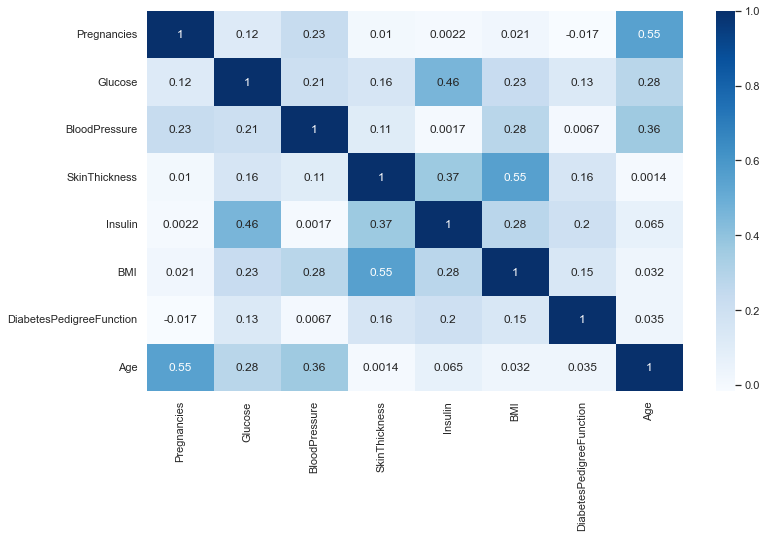

In [205]:
plt.figure(figsize=(12,7))
sns.heatmap(X_res.corr(), cmap='Blues', annot=True);

###### There is significant relationship between two pairs - Pregnancies-Age and SkinThickness-BMI

### Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Apply an appropriate classification algorithm to build a model.

Compare various models with the results from KNN algorithm.

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.








For this classication problem we will check all the classification machine learning algorithm to get better performance and result

Logistic Regression

Decision Tree

RandomForest Classifier

K-Nearest Neighbour (KNN) 

Support Vector Machine (SVM)

Naive Bayes Classifier

Ensemble Learning - Adaptive Boosting

Ensemble Learning - Gradient Boosting (XGBClassifier)

### Scaling

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,train_size=0.75,random_state=100)

In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [209]:
X_train.shape, X_test.shape

((750, 8), (250, 8))

In [333]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

#### Logistic Regression

In [334]:
#Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
parameters = {
    'penalty' : ['l1','l2','elasticnet'],
    'solver' : ['newton-cg','liblinear','lbfgs'] ,
    'C':np.logspace(-5, 5, 50)
}

In [335]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
clf = GridSearchCV(logreg,
             param_grid=parameters,
             scoring = "accuracy",
             cv=5)

In [336]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.714866...
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs']},
             scoring='accuracy')

In [337]:
clf.best_params_

{'C': 0.04714866363457394, 'penalty': 'l2', 'solver': 'liblinear'}

In [338]:
clf.best_score_

0.7586666666666668

#### Model Building

In [339]:
logreg = LogisticRegression(penalty='l2',solver = 'liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [340]:
logreg.score(X_test,y_test)

0.78

In [341]:
y_pred = logreg.predict(X_test)

In [342]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       128
           1       0.77      0.79      0.78       122

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



In [343]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score,precision_recall_curve,average_precision_score

AUC: 0.857


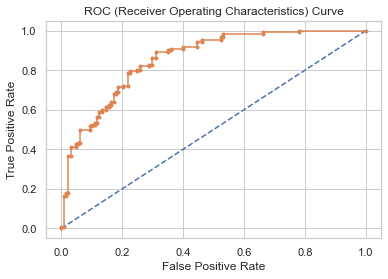

In [344]:

# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = logreg.predict_proba(X_test)             # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only
auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.777 auc_pr=0.824 ap=0.827


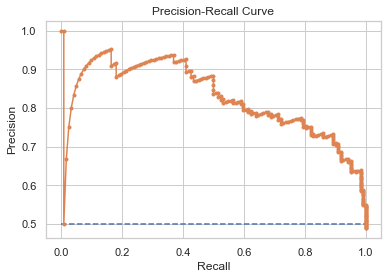

In [345]:
# Precision Recall Curve 

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_pred)                                    # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [346]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, y_pred))
model_f1.append(f1)
model_auc.append(auc_lr)

#### DecisionTree

In [347]:
#Performing hypermarameter tunning using RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier()
param_grid = {
              "criterion": ["gini", "entropy"],
              "max_depth": [3,4,5],
              "max_features":[3,5,7],
              "min_samples_leaf": [2,3,5,7]
}

randomized_cv = RandomizedSearchCV(estimator = tree,
                   param_distributions = param_grid,
                   cv=5)
randomized_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'max_features': [3, 5, 7],
                                        'min_samples_leaf': [2, 3, 5, 7]})

In [348]:
randomized_cv.best_params_

{'min_samples_leaf': 3, 'max_features': 7, 'max_depth': 5, 'criterion': 'gini'}

In [349]:
#creating model with Decision tree algorithm
dt = DecisionTreeClassifier(criterion = 'gini',
                               max_depth= 4,
                               max_features= 5,
                               min_samples_leaf = 5)

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=5)

In [350]:
#Checking accuracy on train and test 
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

print("Train Accuracy is: ", metrics.accuracy_score(y_train,y_train_pred))
print("Test Accuracy is: ", metrics.accuracy_score(y_test,y_test_pred))

Train Accuracy is:  0.876
Test Accuracy is:  0.88


In [351]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       128
           1       0.88      0.87      0.88       122

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



AUC: 0.943


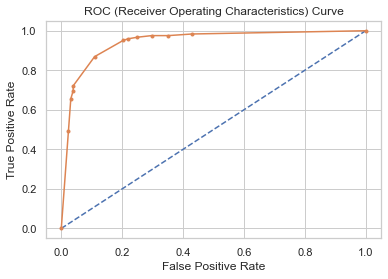

In [352]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = dt.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.876 auc_pr=0.938 ap=0.917


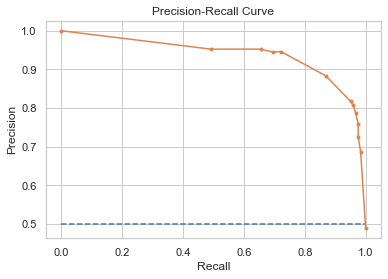

In [353]:
# Precision Recall Curve 

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_test_pred)                                    # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [354]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, y_test_pred))
model_f1.append(f1)
model_auc.append(auc_dt)

#### RandomForest Classifier

In [355]:
#Performing hypermarameter tunning using RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [50,100,150],
    'max_depth': [None,1,3,5,7],
    'min_samples_leaf': [1,3,5]
}

gs_rf = GridSearchCV(estimator=rf, param_grid=parameters, cv=5, verbose=0)
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [357]:
gs_rf.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

In [358]:
gs_rf.best_score_

0.9120000000000001

In [359]:
#creating model with RandomForest algorithm
rf = RandomForestClassifier(max_depth=None, min_samples_leaf=5, n_estimators=100)

rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=5)

In [360]:
#Checking accuracy on train and test 
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

print("Train Accuracy is: ", metrics.accuracy_score(y_train,y_train_pred))
print("Test Accuracy is: ", metrics.accuracy_score(y_test,y_test_pred))

Train Accuracy is:  0.9466666666666667
Test Accuracy is:  0.904


In [361]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       128
           1       0.88      0.93      0.90       122

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250



AUC: 0.967


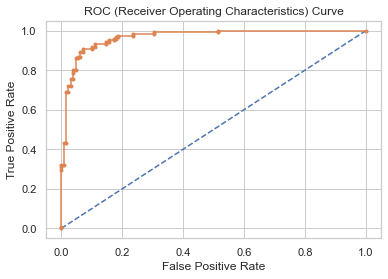

In [362]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = rf.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.905 auc_pr=0.963 ap=0.963


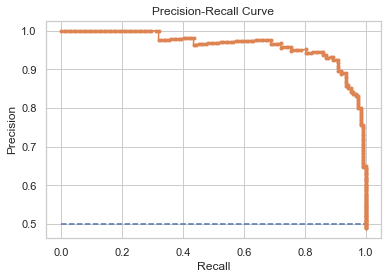

In [363]:
# Precision Recall Curve 

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_test_pred)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [364]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, y_test_pred))
model_f1.append(f1)
model_auc.append(auc_rf)

#### K-Nearest Neighbour (KNN) Classification

In [365]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}
gs_knn = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [366]:
gs_knn.best_params_, gs_knn.best_score_

({'n_neighbors': 8}, 0.8346666666666668)

In [367]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [368]:
#Checking accuracy on train and test 
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

print("Train Accuracy is: ", metrics.accuracy_score(y_train,y_train_pred))
print("Test Accuracy is: ", metrics.accuracy_score(y_test,y_test_pred))

Train Accuracy is:  0.8746666666666667
Test Accuracy is:  0.816


#slightly overfitting

In [369]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       128
           1       0.79      0.84      0.82       122

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



AUC: 0.891


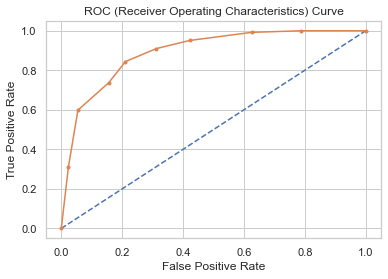

In [370]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.817 auc_pr=0.880 ap=0.854


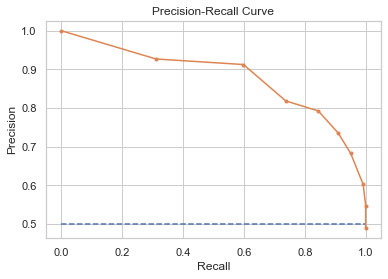

In [371]:
# Precision Recall Curve 

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_test_pred)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [372]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, y_test_pred))
model_f1.append(f1)
model_auc.append(auc_knn)

#### Support Vector Machine (SVM)

In [373]:
from sklearn.svm import SVC
svm = SVC()
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}
gs_svm = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [374]:
gs_svm.best_params_, gs_svm.best_score_

({'C': 10, 'gamma': 0.005}, 0.7493333333333334)

In [375]:
svm = SVC(kernel='rbf', C=10, gamma=0.005, probability=True)
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.005, probability=True)

In [376]:
#Checking accuracy on train and test 
y_test_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)

print("Train Accuracy is: ", metrics.accuracy_score(y_train,y_train_pred))
print("Test Accuracy is: ", metrics.accuracy_score(y_test,y_test_pred))

Train Accuracy is:  0.752
Test Accuracy is:  0.76


In [377]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       128
           1       0.75      0.75      0.75       122

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



AUC: 0.856


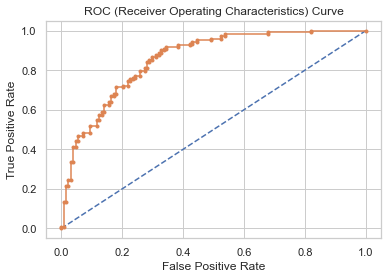

In [378]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = svm.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.754 auc_pr=0.820 ap=0.822


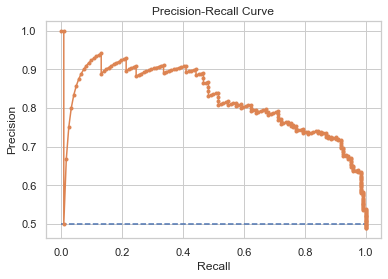

In [379]:
# Precision Recall Curve 

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_test_pred)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [380]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, y_test_pred))
model_f1.append(f1)
model_auc.append(auc_svm)

#### Naive Bayes

In [285]:
pip install scikit-optimize


     ------------------------------------ 100.3/100.3 kB 720.2 kB/s eta 0:00:00


In [381]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [382]:
#Checking accuracy on train and test 
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)

print("Train Accuracy is: ", metrics.accuracy_score(y_train,y_train_pred))
print("Test Accuracy is: ", metrics.accuracy_score(y_test,y_test_pred))

Train Accuracy is:  0.764
Test Accuracy is:  0.78


In [383]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       128
           1       0.78      0.77      0.77       122

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



AUC: 0.857


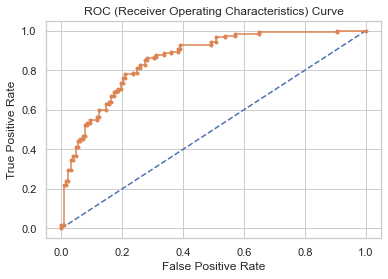

In [384]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = gnb.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_gnb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_gnb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.774 auc_pr=0.829 ap=0.832


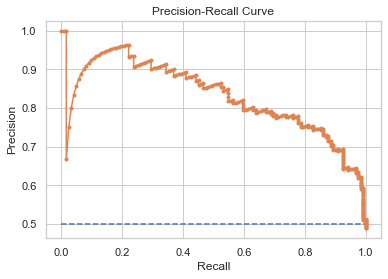

In [385]:
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_test_pred)                                    # calculate F1 score
auc_gnb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_gnb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [386]:
models.append('NB')
model_accuracy.append(accuracy_score(y_test, y_test_pred))
model_f1.append(f1)
model_auc.append(auc_gnb)

#### Ensemble Learning - Ada Boosting

In [387]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
parameters = {'n_estimators': [100,200,300,400,500,700,1000]}
gs_ada = GridSearchCV(ada, param_grid = parameters, cv=5, verbose=0)
gs_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 700, 1000]})

In [388]:
gs_ada.best_params_,gs_ada.best_score_

({'n_estimators': 100}, 0.8893333333333333)

In [389]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [390]:
#Checking accuracy on train and test 
y_test_pred = ada.predict(X_test)
y_train_pred = ada.predict(X_train)

print("Train Accuracy is: ", metrics.accuracy_score(y_train,y_train_pred))
print("Test Accuracy is: ", metrics.accuracy_score(y_test,y_test_pred))

Train Accuracy is:  0.9586666666666667
Test Accuracy is:  0.888


#overfitting

In [391]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       128
           1       0.87      0.90      0.89       122

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



AUC: 0.948


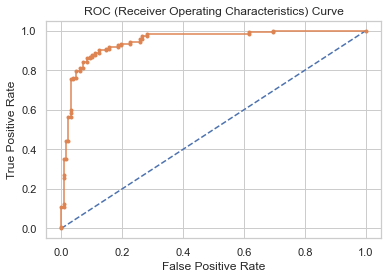

In [392]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = ada.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_ada = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_ada)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.887 auc_pr=0.937 ap=0.937


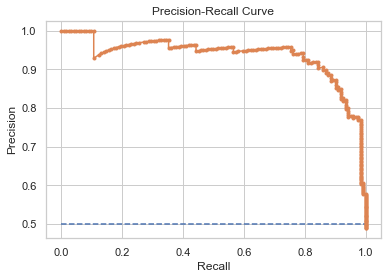

In [393]:
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_test_pred)                                    # calculate F1 score
auc_ada_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_ada_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [394]:
models.append('ADA')
model_accuracy.append(accuracy_score(y_test, y_test_pred))
model_f1.append(f1)
model_auc.append(auc_ada)

#### Ensemble Learning - Gradient Boosting

In [316]:
pip install XGBoost

     -------------------------------------- 125.4/125.4 MB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [395]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', nthread=4, seed=10)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
gs_xgb = GridSearchCV(xgb, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv=5, verbose=0)
gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc')

In [396]:
gs_xgb.best_params_,gs_xgb.best_score_

({'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 180},
 0.9705565544491861)

In [397]:
xgb = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', 
                    nthread=4, seed=10, learning_rate= 0.05, max_depth= 6, n_estimators= 180)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=10, reg_alpha=0, ...)

In [398]:
#Checking accuracy on train and test 
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

print("Train Accuracy is: ", metrics.accuracy_score(y_train,y_train_pred))
print("Test Accuracy is: ", metrics.accuracy_score(y_test,y_test_pred))

Train Accuracy is:  1.0
Test Accuracy is:  0.916


In [399]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       128
           1       0.89      0.94      0.92       122

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



AUC: 0.974


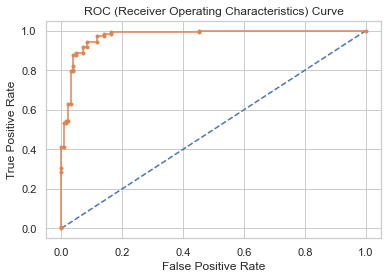

In [400]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = xgb.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_xgb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_xgb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.916 auc_pr=0.969 ap=0.969


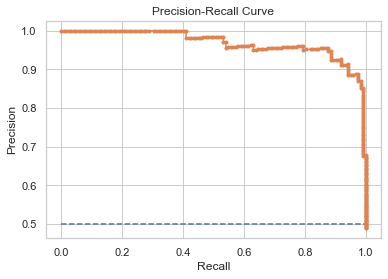

In [402]:
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_test_pred)                                    # calculate F1 score
auc_xgb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_xgb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [411]:
models.append('XGB')
model_accuracy.append(accuracy_score(y_test, y_test_pred))
model_f1.append(f1)
model_auc.append(auc_xgb)

In [412]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

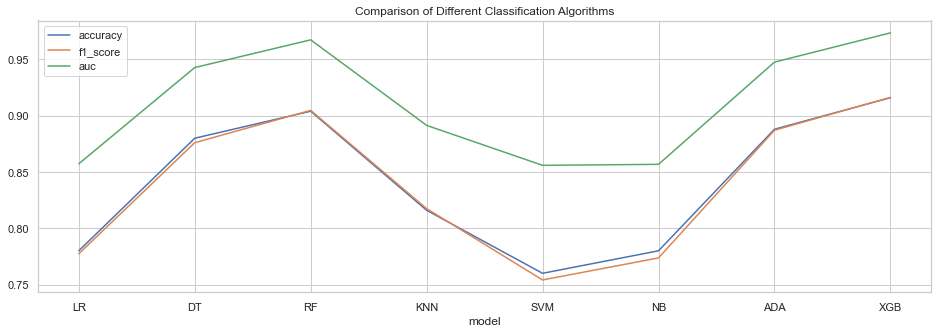

In [413]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms");

In [414]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.780,0.777328,0.857262
DT,0.880,0.876033,0.942783
RF,0.904,0.904762,0.967405
KNN,0.816,0.817460,0.891425
SVM,0.760,0.754098,0.855917
NB,0.780,0.773663,0.856814
ADA,0.888,0.887097,0.947618
XGB,0.916,0.916335,0.973617


### Both RandomForest and XGBoost has given good accuracy and f1_score. But if we check the train and test accuracy RF does not seems to be overfitted. Therefore we will opt RandomForest. ( Decision Tree also given very good result with robust train and test accuracy)

In [415]:
#Final Model Report
selected_model = rf

In [416]:
#Classification Report
print(classification_report(y_test, selected_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       128
           1       0.88      0.93      0.90       122

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250



In [417]:
#Confusion Matrix
confusion = confusion_matrix(y_test, selected_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[112  16]
 [  8 114]]


In [418]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN) # also called recall
Specificity = TN/(TN+FP)

print("Accuracy: %.4f"%Accuracy)
print("Precision: %.4f"%Precision)
print("Sensitivity: %.4f"%Sensitivity)
print("Specificity: %.4f"%Specificity)
print("AUC: %.4f"%auc_rf)

Accuracy: 0.9040
Precision: 0.8769
Sensitivity: 0.9344
Specificity: 0.8750
AUC: 0.9674
